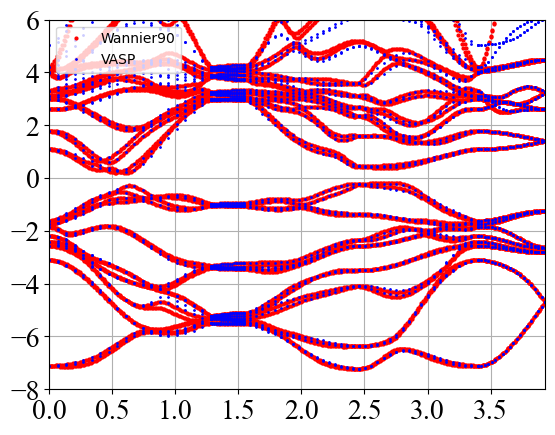

In [3]:

# 通过读取Wannier90给出的能带数据wannier90_band.dat，与VASP结合vaspkit得到的数据BAND.dat
# 来绘制 wannier插值后的能带与VASP计算的能带之间的差距
#-----------------------------------------------------------------
from cProfile import label
import os
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------------------------------
def dataread():
    da1 = "wannier90_band.dat"
    x0 = []
    y0 = []
    with open(da1) as file:
            fermi =  7.018942
            da = file.readlines()
            for f1 in da:
               
                temp = f1.strip().split()
                
                # 移除字符串头尾指定的字符（默认为空格）,并以空格将这些字符串分开
                if len(temp) != 0:
                    x0.append(float(temp[0]))
                    y0.append(float(temp[1])-fermi)#wannier90输出没有减去fermi因此在此处减去
    plt.scatter(x0,y0,s = 1, color = 'red', alpha = 0.7,marker = '.')
    plt.plot(x0,y0,'ro',markersize = 2,label="Wannier90")

    da2 = "BAND.dat"
    #需要手动删除开头的几行带有#号的
    x1 = []
    y1 = []
    with open(da2) as file:
            da = file.readlines()
            for f1 in da:
                temp = f1.strip().split()  # 移除字符串头尾指定的字符（默认为空格）,并以空格将这些字符串分开
                if len(temp) == 2:
                    x1.append(float(temp[0]))
                    y1.append(float(temp[1]))
    #plt.scatter(x1,y1 ,s = 1, color = 'blue', alpha = 0.7, marker = '.')
    plt.plot(x1,y1,'bo',markersize = 1,label = "VASP")
    plt.yticks(fontproperties='Times New Roman', size = 20)
    plt.xticks(fontproperties='Times New Roman', size = 20)
    plt.xlim(np.min(x0),np.max(x0))
    plt.legend(loc = 2,ncol = 1)
    plt.grid(True)
    plt.ylim(-8,6)#需要手动调整能量范围
    picname = "band-compare.png"
    plt.savefig(picname, dpi = 600, bbox_inches = 'tight')
#--------------------------------------------------------------
def main():
    os.chdir(os.getcwd())# 确定用户执行路径
    dataread()
#----------------------------------------------------------------
if __name__=='__main__':
    main()

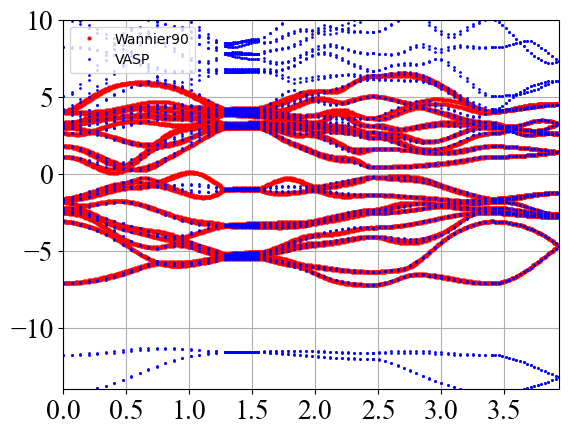

In [5]:
# 通过读取Wannier90给出的能带数据wannier90_band.dat，与VASP结合vaspkit得到的数据BAND.dat
# 来绘制 wannier插值后的能带与VASP计算的能带之间的差距
#-----------------------------------------------------------------
from cProfile import label
import os
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------------------------------
def dataread():
    da1 = "wannier90_band1.dat"
    x0 = []
    y0 = []
    with open(da1) as file:
            fermi =  7.018942
            da = file.readlines()
            for f1 in da:
               
                temp = f1.strip().split()
                
                # 移除字符串头尾指定的字符（默认为空格）,并以空格将这些字符串分开
                if len(temp) != 0:
                    x0.append(float(temp[0]))
                    y0.append(float(temp[1])-fermi)#wannier90输出没有减去fermi因此在此处减去
    plt.scatter(x0,y0,s = 1, color = 'red', alpha = 0.7,marker = '.')
    plt.plot(x0,y0,'ro',markersize = 2,label="Wannier90")

    da2 = "BAND1.dat"
    #需要手动删除开头的几行带有#号的
    x1 = []
    y1 = []
    with open(da2) as file:
            da = file.readlines()
            for f1 in da:
                temp = f1.strip().split()  # 移除字符串头尾指定的字符（默认为空格）,并以空格将这些字符串分开
                if len(temp) == 2:
                    x1.append(float(temp[0]))
                    y1.append(float(temp[1]))
    #plt.scatter(x1,y1 ,s = 1, color = 'blue', alpha = 0.7, marker = '.')
    plt.plot(x1,y1,'bo',markersize = 1,label = "VASP")
    plt.yticks(fontproperties='Times New Roman', size = 20)
    plt.xticks(fontproperties='Times New Roman', size = 20)
    plt.xlim(np.min(x0),np.max(x0))
    plt.legend(loc = 2,ncol = 1)
    plt.grid(True)
    plt.ylim(-14,10)#需要手动调整能量范围
    picname = "band-compare.png"
    plt.savefig(picname, dpi = 600, bbox_inches = 'tight')
#--------------------------------------------------------------
def main():
    os.chdir(os.getcwd())# 确定用户执行路径
    dataread()
#----------------------------------------------------------------
if __name__=='__main__':
    main()

正在构建矩阵
--------------------------------------------
正在求解矩阵


C:\anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


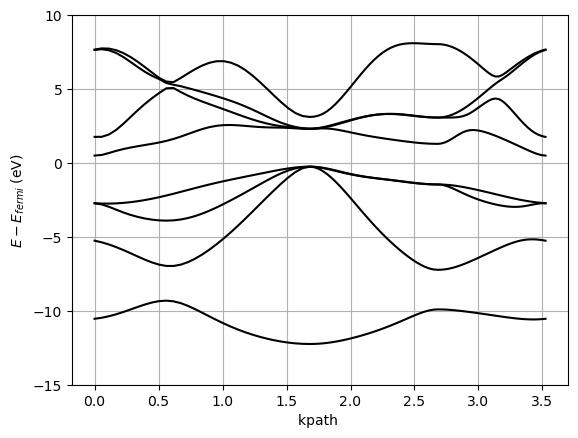

处理完成


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
 
start_time = time.process_time()
#读取hr当中的信息
with open("wannier90_hr.dat", "r") as f:
    lines = f.readlines()
    f.close()
#需要根据具体能带数进行调整,从数据第二行当中读取所需的能带属
num_wan = int(lines[1].strip())
#读取第三行当中的权重个数
Nrpts = int(lines[2].strip())
# 初始化一个列表来存储数据
data = []

# 从第四行开始读取数据并提取所有组元，直到data中的数据个数等于Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    # 将当前行的数据组元分割开来，并加入data中
    elements = line.strip().split()
    data.extend(elements)
# 将 data 转换为浮点数列表
data = [float(x) for x in data]
#晶格常数
a = 5.43
#基矢需要根据poscar当中的数据修改
basis_vector = np.array([[0.5, 0.5, 0],[0, 0.5, 0.5],[0.5, 0, 0.5]])*a
#确定k点的精度
k_mesh = 30
#fermi能的数值
E_fermi = 5.76
#k点的路径
K_point_path = [[-1/3, 2/3, 0], [0.00000,0.00000,0.00000], [0.0,0.50000,0.00000], [-1/3,2/3,0.00000]]



Symmetry_point_label1 = "K"
Symmetry_point_label2 = "G"
Symmetry_point_label3 = "M"
Symmetry_point_label4 = "K"
 
#确定能量的上下限
lower_bound = -15
upper_bound = 10

#计算倒格矢根据公式计算
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]
 
#将k点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

#定义k点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point
 
#定义波函数，R是提取数据中的位移矢量exp（i*（k*R））
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)
 
# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
#初始化矩阵元与位移矢量的结构
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)#保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息当中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息当中的位移矢量
    return factor, R


# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    # 获取 factor 数组中的当前复数
                    factor_vector = factor[i][j][k]
                    
                    # 获取 data 中的当前值
                    data_value = data[data_index]
                    
                    # 避免除以零
                    if data_value != 0:
                        # 分别计算 factor 矢量的实部和虚部与 data 的比值
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                        
                    col.append(divided_vector)
                    # 循环 data_index 以便重新对应
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor



def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan),dtype='complex')#根据能带条数定义矩阵（X*X）
    #构建矩阵
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):#可以调节所需的近邻
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H
 
 
# 运行能带结构计算
def run():
    solution = [[] for _ in range(num_wan)]

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    # 计算处理后的 R
    #print(factor[5][0])
    factor_normalized = divide_factor_by_data(data, factor)
    #print(factor_normalized[5][0])
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eig = np.linalg.eigvals(H)
        eig = np.sort(eig)
        for i in range(len(eig)):
            solution[i].append(eig[i] - E_fermi)
    
    return solution, k_line

# 计算绘图的k点距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances
#将每个k点之间的距离求出作为x轴坐标
solution, k_line = run()
k_distances = k_point_distances(k_line)

ax = plt.axes()
for band in solution:
    ax.plot(k_distances, band, color='black')

plt.ylim(lower_bound, upper_bound)
plt.grid(True)
plt.ylabel(r"$E - E_{fermi}$"' (eV)')
plt.xlabel("kpath ")
plt.show()

end_time = time.process_time()

print("处理完成")
# print('CPU执行时间（分钟）=', (end_time - start_time) / 60)


正在构建矩阵
--------------------------------------------
正在求解矩阵


C:\anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


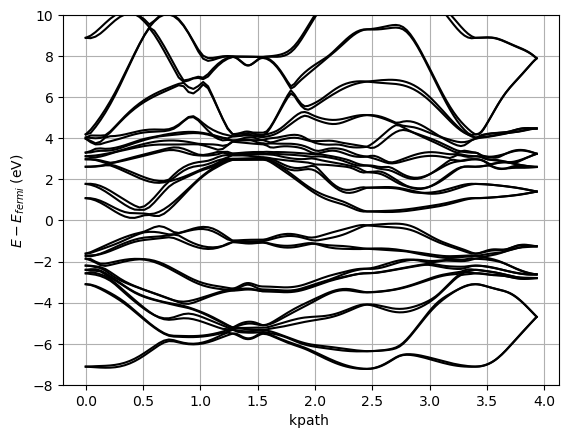

处理完成


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
 
start_time = time.process_time()
#读取hr当中的信息
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()
    f.close()
#需要根据具体能带数进行调整,从数据第二行当中读取所需的能带属
num_wan = int(lines[1].strip())
#读取第三行当中的权重个数
Nrpts = int(lines[2].strip())
# 初始化一个列表来存储数据
data = []

# 从第四行开始读取数据并提取所有组元，直到data中的数据个数等于Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    # 将当前行的数据组元分割开来，并加入data中
    elements = line.strip().split()
    data.extend(elements)
# 将 data 转换为浮点数列表
data = [float(x) for x in data]
#晶格常数
a = 1
#基矢需要根据poscar当中的数据修改
basis_vector = np.array([[6.359719, 0.000000, 0.000000],[4.466833, 4.526966, 0.000000],[-5.4132758195, -2.2634831998, 2.4533878446]])*a
#确定k点的精度
k_mesh = 30
#fermi能的数值
E_fermi = 7.0189
#k点的路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]



Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"
#确定能量的上下限
lower_bound = -8
upper_bound = 10

#计算倒格矢根据公式计算
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]
 
#将k点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

#定义k点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point
 
#定义波函数，R是提取数据中的位移矢量exp（i*（k*R））
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)
 
# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
#初始化矩阵元与位移矢量的结构
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)#保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息当中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息当中的位移矢量
    return factor, R


# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    # 获取 factor 数组中的当前复数
                    factor_vector = factor[i][j][k]
                    
                    # 获取 data 中的当前值
                    data_value = data[data_index]
                    
                    # 避免除以零
                    if data_value != 0:
                        # 分别计算 factor 矢量的实部和虚部与 data 的比值
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                        
                    col.append(divided_vector)
                    # 循环 data_index 以便重新对应
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor



def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan),dtype='complex')#根据能带条数定义矩阵（X*X）
    #构建矩阵
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):#可以调节所需的近邻
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H
 
 
# 运行能带结构计算
def run():
    solution = [[] for _ in range(num_wan)]

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    # 计算处理后的 R
    #print(factor[5][0])
    factor_normalized = divide_factor_by_data(data, factor)
    #print(factor_normalized[5][0])
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eig = np.linalg.eigvals(H)
        eig = np.sort(eig)
        for i in range(len(eig)):
            solution[i].append(eig[i] - E_fermi)
    
    return solution, k_line

# 计算绘图的k点距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances
#将每个k点之间的距离求出作为x轴坐标
solution, k_line = run()
k_distances = k_point_distances(k_line)

ax = plt.axes()
for band in solution:
    ax.plot(k_distances, band, color='black')

plt.ylim(lower_bound, upper_bound)
plt.grid(True)
plt.ylabel(r"$E - E_{fermi}$"' (eV)')
plt.xlabel("kpath ")
plt.show()

end_time = time.process_time()

print("处理完成")
# print('CPU执行时间（分钟）=', (end_time - start_time) / 60)


In [ ]:
# Modified run() function to include eigenvectors
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # Get both eigenvalues and eigenvectors
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # Store eigenvectors for later use
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# After computing the Hamiltonian and eigenvectors, compute the expectation value of S_z
solution, k_line, eigvecs_list = run()

# Compute S_z expectation values
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # Expectation value of S_z
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# Plot the band structure and S_z expectation values
fig, ax1 = plt.subplots()

# Band structure plot
for band in solution:
    ax1.plot(k_distances, band, color='black')
ax1.set_xlabel("kpath ")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# Secondary y-axis for S_z expectation values
ax2 = ax1.twinx()
for Sz_expectation_k in S_z_expectation:
    ax2.plot(k_distances, Sz_expectation_k, linestyle='--', color='red')
ax2.set_ylabel(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()

print("处理完成")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# 对称点标签
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"

# 能量的上下限
lower_bound = -8
upper_bound = 10

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, -1]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sz)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图
for band in solution:
    ax1.plot(k_distances, band, color='black')
ax1.set_xlabel("kpath ")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# 绘制 S_z 期望值的二级 y 轴
ax2 = ax1.twinx()
for Sz_expectation_k in S_z_expectation:
    ax2.plot(k_distances, Sz_expectation_k, linestyle='--', color='red')
ax2.set_ylabel(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 36 is different from 72)

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# start_time = time.process_time()

# # 读取文件 "wannier90_hr_TaAs.dat"
# with open("wannier90_hr_TaAs.dat", "r") as f:
#     lines = f.readlines()

# # 读取文件中的能带数（第二行）
# num_wan = int(lines[1].strip())

# # 读取权重个数（第三行）
# Nrpts = int(lines[2].strip())

# # 初始化列表存储数据
# data = []

# # 从第四行开始读取数据，直到数据个数等于 Nrpts
# for line in lines[3:]:
#     if len(data) >= Nrpts:
#         break
#     elements = line.strip().split()
#     data.extend(elements)

# # 将 data 转换为浮点数列表
# data = [float(x) for x in data]

# # 定义晶格常数
# a = 1

# # 基矢（从 POSCAR 文件中提取数据后需要修改）
# basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# # 确定 k 点的精度
# k_mesh = 30

# # 费米能级
# E_fermi = 7.0189

# # k 点路径
# K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# # 对称点标签
# Symmetry_point_label1 = "G"
# Symmetry_point_label2 = "X"
# Symmetry_point_label3 = "P"
# Symmetry_point_label4 = "N"
# Symmetry_point_label5 = "G"
# Symmetry_point_label6 = "M"

# # 能量的上下限
# lower_bound = -8
# upper_bound = 10

# # 计算倒格矢
# V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
# rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
#        np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
#        np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# # 将 k 点转化为倒空间格点
# for i in range(len(K_point_path)):
#     K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# # 定义 k 点路径
# def k_path():
#     k_point = []
#     for i in range(len(K_point_path) - 1):
#         interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
#         interval = interval / k_mesh
#         for j in range(k_mesh + 1):
#             k_point.append(np.array(K_point_path[i]) + j * interval)
#     return k_point

# # 定义波函数，R 是位移矢量
# def phase(R1, R2, R3, k1, k2, k3):
#     R1_vector = R1 * np.array(basis_vector[0])
#     R2_vector = R2 * np.array(basis_vector[1])
#     R3_vector = R3 * np.array(basis_vector[2])
#     R_vec = R1_vector + R2_vector + R3_vector
#     inner_product = np.dot(R_vec, [k1, k2, k3])
#     return np.exp(1j * inner_product)

# # 从数据中提取矩阵元和位移矢量
# def matrix_element():
#     factor = []
#     R = []
#     for i in range(num_wan):
#         factor.append([])
#         R.append([])
#         for j in range(num_wan):
#             factor[-1].append([])
#             R[-1].append([])

#     for line in lines:
#         if len(line.split()) == 7:  # 确保提取的是含有信息的数据
#             real_part = round(float(line.split()[5]), 3)  # 保留3位小数
#             imag_part = round(float(line.split()[6]), 3)
#             factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
#                 real_part + 1j * imag_part)  # 提取信息中的实部和虚部
#             R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
#                 [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
#     return factor, R

# # 计算 factor 的实部和虚部分别除以 data 对应值的函数
# def divide_factor_by_data(data, factor):
#     normalized_factor = []
#     data_index = 0

#     for i in range(len(factor)):
#         row = []
#         for j in range(len(factor[i])):
#             col = []
#             for k in range(len(factor[i][j])):
#                 if data_index < len(data):
#                     factor_vector = factor[i][j][k]
#                     data_value = data[data_index]
#                     if data_value != 0:
#                         real_part = factor_vector.real / data_value
#                         imag_part = factor_vector.imag / data_value
#                         divided_vector = real_part + 1j * imag_part
#                     else:
#                         divided_vector = factor_vector
#                     col.append(divided_vector)
#                     data_index = (data_index + 1) % len(data)
#             row.append(col)
#         normalized_factor.append(row)

#     return normalized_factor

# # 构建哈密顿矩阵
# def matrix_construct(factor_normalized, R, k1, k2, k3):
#     H = np.zeros((num_wan, num_wan), dtype='complex')
#     for i in range(num_wan):
#         for j in range(num_wan):
#             for k in range(len(R[i][j])):
#                 H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
#     return H

# # 计算能带结构并提取特征向量
# def run():
#     solution = [[] for _ in range(num_wan)]
#     eigvecs_list = []

#     k_line = k_path()
#     print('正在构建矩阵')
#     factor, R = matrix_element()
#     factor_normalized = divide_factor_by_data(data, factor)
#     print('--------------------------------------------')
#     print('正在求解矩阵')
#     for l, k in enumerate(k_line):
#         H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
#         eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
#         eigvals = np.sort(eigvals)
#         eigvecs_list.append(eigvecs)  # 存储特征向量
#         for i in range(len(eigvals)):
#             solution[i].append(eigvals[i] - E_fermi)
    
#     return solution, k_line, eigvecs_list

# # 计算 k 点之间的距离
# def k_point_distances(k_points):
#     distances = [0]
#     for i in range(1, len(k_points)):
#         dk = np.linalg.norm(k_points[i] - k_points[i - 1])
#         distances.append(distances[-1] + dk)
#     return distances

# # 自旋矩阵
# hbar = 1  # 普朗克常数（设定为1简化计算）
# Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
# Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
# Sz = (hbar / 2) * np.array([[1, 0], [0, 0]])

# # 单位矩阵（18x18）
# I = np.eye(18)
# S_z = np.kron(I, Sz)

# # 运行程序并获取解
# solution, k_line, eigvecs_list = run()
# k_distances = k_point_distances(k_line)

# # 计算 S_z 的期望值
# S_z_expectation = []
# for eigvecs in eigvecs_list:
#     Sz_expectation_k = []
#     for i in range(num_wan):
#         Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
#         Sz_expectation_k.append(Sz_expectation_value)
#     S_z_expectation.append(Sz_expectation_k)

# # 绘制能带结构和 S_z 期望值
# fig, ax1 = plt.subplots()

# # 能带结构绘图，使用散点图并将 S_z 期望值作为颜色
# for i, band in enumerate(solution):
#     S_z_weights = [abs(Sz[i]) for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
#     sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm', s=20)  # s=20 控制点的大小

# ax1.set_xlabel("kpath")
# ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# # 添加颜色条以显示 S_z 权重
# cbar = plt.colorbar(sc, ax=ax1)
# cbar.set_label(r"$\langle S_z \rangle$")

# plt.show()

# end_time = time.process_time()
# print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


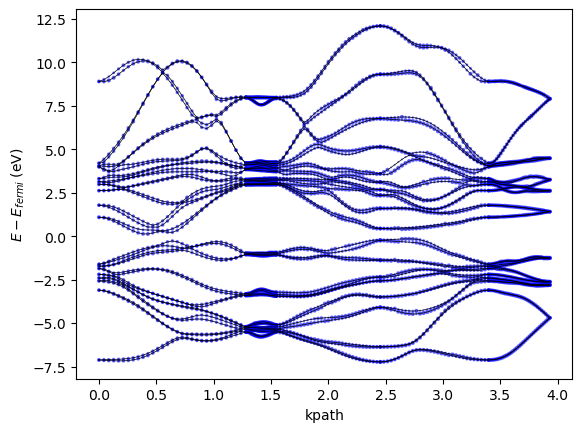

处理完成，运行时间: 336.953125


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# 对称点标签
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"

# 能量的上下限
lower_bound = -8
upper_bound = 10

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, 0]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sz)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图，使用折线图
for i, band in enumerate(solution):
    ax1.plot(k_distances, band, 'k-', linewidth=0.5)

# 绘制气泡图，S_z 期望值决定气泡大小
for i, band in enumerate(solution):
    S_z_weights = [abs(Sz[i]) for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
    bubble_size = [50 * abs(Sz[i]) for Sz in S_z_expectation]  # 气泡大小与 S_z 的期望值相关
    # sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm', s=bubble_size)  # s=气泡大小
    sc = ax1.scatter(k_distances, band, s=bubble_size,c='blue', alpha=0.5)  # s=气泡大小
ax1.set_xlabel("kpath")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# # 添加颜色条以显示 S_z 权重
# cbar = plt.colorbar(sc, ax=ax1)
# cbar.set_label(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


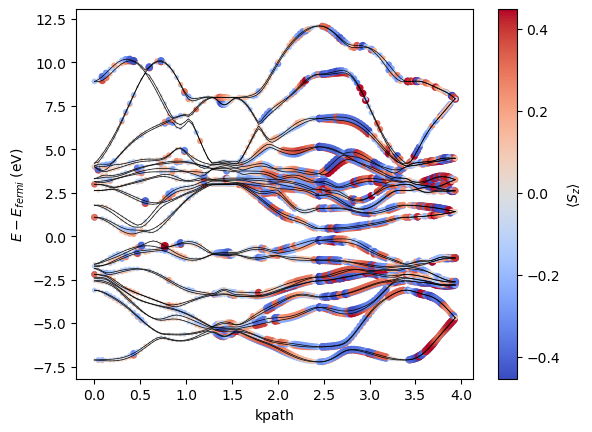

处理完成，运行时间: 333.46875


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# 对称点标签
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"

# 能量的上下限
lower_bound = -8
upper_bound = 10

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, -1]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sz)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图，使用折线图
for i, band in enumerate(solution):
    ax1.plot(k_distances, band, 'k-', linewidth=0.5)

# 绘制气泡图，S_z 期望值决定气泡大小
for i, band in enumerate(solution):
    S_z_weights = [Sz[i] for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
    bubble_size = [50 * abs(Sz[i]) for Sz in S_z_expectation]  # 气泡大小与 S_z 的期望值相关
    sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm', s=bubble_size)  # s=气泡大小
    
ax1.set_xlabel("kpath")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# 添加颜色条以显示 S_z 权重
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


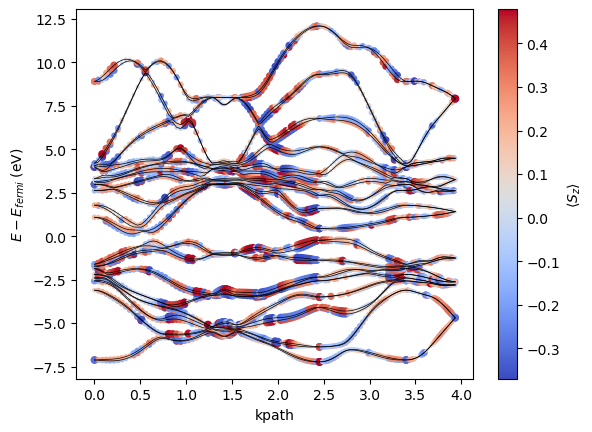

处理完成，运行时间: 335.265625


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# 对称点标签
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"

# 能量的上下限
lower_bound = -8
upper_bound = 10

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, -1]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sx)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图，使用折线图
for i, band in enumerate(solution):
    ax1.plot(k_distances, band, 'k-', linewidth=0.5)

# 绘制气泡图，S_z 期望值决定气泡大小
for i, band in enumerate(solution):
    S_z_weights = [Sz[i] for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
    bubble_size = [50 * abs(Sz[i]) for Sz in S_z_expectation]  # 气泡大小与 S_z 的期望值相关
    sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm', s=bubble_size)  # s=气泡大小
    
ax1.set_xlabel("kpath")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# 添加颜色条以显示 S_z 权重
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


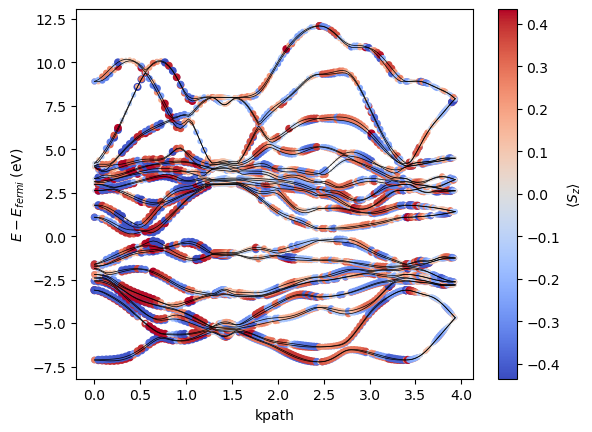

处理完成，运行时间: 326.90625


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# 对称点标签
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"

# 能量的上下限
lower_bound = -8
upper_bound = 10

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, -1]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sy)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图，使用折线图
for i, band in enumerate(solution):
    ax1.plot(k_distances, band, 'k-', linewidth=0.5)

# 绘制气泡图，S_z 期望值决定气泡大小
for i, band in enumerate(solution):
    S_z_weights = [Sz[i] for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
    bubble_size = [50 * abs(Sz[i]) for Sz in S_z_expectation]  # 气泡大小与 S_z 的期望值相关
    sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm', s=bubble_size)  # s=气泡大小
    
ax1.set_xlabel("kpath")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# 添加颜色条以显示 S_z 权重
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


C:\anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\anaconda\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


(-7.135010005512942+1.039781981912642e-15j)
(-7.10639265761081+1.1526555325270403e-15j)
(-3.1423228715406846+3.781821100685439e-16j)
(-3.123850144895763+2.567326415055624e-16j)
(-2.6068161170364466+3.0657393265282977e-16j)
(-2.5370111923256644-4.9934873730144435e-16j)
(-2.446939840536019-2.838199679233377e-17j)
(-2.374932231099912-3.7474000136870256e-16j)
(-2.2201632874028725+3.393438852846664e-16j)
(-2.205982273899398+5.81741313380868e-16j)
(-1.9417392096031794-1.0179539137719378e-17j)
(-1.8803651683563753+3.6969269738160293e-16j)
(-1.7479867453229865-5.991737480079646e-16j)
(-1.6986690316873458+1.297695614353547e-16j)
(-1.5798405101685997+1.0296380629929488e-15j)
(-1.5447148539190572+9.419765325745967e-16j)
(1.0506593079319373-2.329850608499234e-16j)
(1.0809828748958186-5.727602819641535e-16j)
(1.7373743966932889-4.950284207929329e-16j)
(1.7854080154151095-4.717427891022838e-16j)
(2.613991647042308+6.603973498554577e-16j)
(2.624409255568576-8.381654852152368e-20j)
(2.971383723667529+

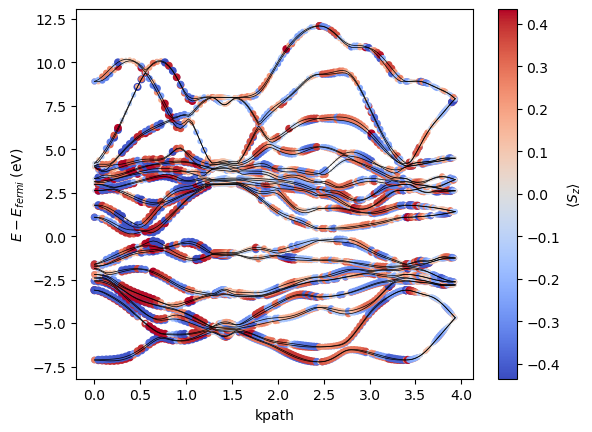

处理完成，运行时间: 326.03125


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[0.00, 0.00, 0.00], [0.00, 0.00, 0.50], [0.25, 0.25, 0.25], [0.00, 0.50, 0.00], [0.00, 0.00, 0.00], [0.50, 0.50, -0.50]]

# 对称点标签
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "X"
Symmetry_point_label3 = "P"
Symmetry_point_label4 = "N"
Symmetry_point_label5 = "G"
Symmetry_point_label6 = "M"

# 能量的上下限
lower_bound = -8
upper_bound = 10

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, -1]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sy)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图，使用折线图
for i, band in enumerate(solution):
    ax1.plot(k_distances, band, 'k-', linewidth=0.5)

# 绘制气泡图，S_z 期望值决定气泡大小
for i, band in enumerate(solution):
    print(band[1])
    S_z_weights = [Sz[i] for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
    bubble_size = [50 * abs(Sz[i]) for Sz in S_z_expectation]  # 气泡大小与 S_z 的期望值相关
    sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm', s=bubble_size)  # 使用气泡图绘制
    
ax1.set_xlabel("kpath")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")

# 添加颜色条以显示 S_z 权重
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)


正在构建矩阵
--------------------------------------------
正在求解矩阵


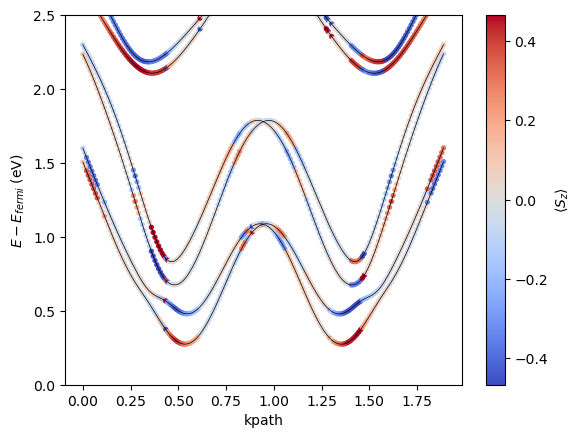

处理完成，运行时间: 442.78125


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.process_time()

# 读取文件 "wannier90_hr_TaAs.dat"
with open("wannier90_hr_TaAs.dat", "r") as f:
    lines = f.readlines()

# 读取文件中的能带数（第二行）
num_wan = int(lines[1].strip())

# 读取权重个数（第三行）
Nrpts = int(lines[2].strip())

# 初始化列表存储数据
data = []

# 从第四行开始读取数据，直到数据个数等于 Nrpts
for line in lines[3:]:
    if len(data) >= Nrpts:
        break
    elements = line.strip().split()
    data.extend(elements)

# 将 data 转换为浮点数列表
data = [float(x) for x in data]

# 定义晶格常数
a = 1

# 基矢（从 POSCAR 文件中提取数据后需要修改）
basis_vector = np.array([[6.359719, 0.000000, 0.000000], [4.466833, 4.526966, 0.000000], [-5.4132758195, -2.2634831998, 2.4533878446]]) * a

# 确定 k 点的精度
k_mesh = 30

# 费米能级
E_fermi = 7.0189

# k 点路径
K_point_path = [[-0.3, -0.2, -0.1], [0.00, 0.00, 0.00], [0.3, 0.2, 0.1]]

# 对称点标签
Symmetry_point_label1 = "X"
Symmetry_point_label2 = "G"
Symmetry_point_label3 = "P"


# 能量的上下限
lower_bound = -0
upper_bound = 2.5

# 计算倒格矢
V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]))
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]

# 将 k 点转化为倒空间格点
for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]

# 定义 k 点路径
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_mesh
        for j in range(k_mesh + 1):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

# 定义波函数，R 是位移矢量
def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)

# 从数据中提取矩阵元和位移矢量
def matrix_element():
    factor = []
    R = []
    for i in range(num_wan):
        factor.append([])
        R.append([])
        for j in range(num_wan):
            factor[-1].append([])
            R[-1].append([])

    for line in lines:
        if len(line.split()) == 7:  # 确保提取的是含有信息的数据
            real_part = round(float(line.split()[5]), 3)  # 保留3位小数
            imag_part = round(float(line.split()[6]), 3)
            factor[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                real_part + 1j * imag_part)  # 提取信息中的实部和虚部
            R[int(line.split()[3]) - 1][int(line.split()[4]) - 1].append(
                [float(line.split()[0]), float(line.split()[1]), float(line.split()[2])])  # 提取信息中的位移矢量
    return factor, R

# 计算 factor 的实部和虚部分别除以 data 对应值的函数
def divide_factor_by_data(data, factor):
    normalized_factor = []
    data_index = 0

    for i in range(len(factor)):
        row = []
        for j in range(len(factor[i])):
            col = []
            for k in range(len(factor[i][j])):
                if data_index < len(data):
                    factor_vector = factor[i][j][k]
                    data_value = data[data_index]
                    if data_value != 0:
                        real_part = factor_vector.real / data_value
                        imag_part = factor_vector.imag / data_value
                        divided_vector = real_part + 1j * imag_part
                    else:
                        divided_vector = factor_vector
                    col.append(divided_vector)
                    data_index = (data_index + 1) % len(data)
            row.append(col)
        normalized_factor.append(row)

    return normalized_factor

# 构建哈密顿矩阵
def matrix_construct(factor_normalized, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] += factor_normalized[i][j][k] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

# 计算能带结构并提取特征向量
def run():
    solution = [[] for _ in range(num_wan)]
    eigvecs_list = []

    k_line = k_path()
    print('正在构建矩阵')
    factor, R = matrix_element()
    factor_normalized = divide_factor_by_data(data, factor)
    print('--------------------------------------------')
    print('正在求解矩阵')
    for l, k in enumerate(k_line):
        H = matrix_construct(factor_normalized, R, k[0], k[1], k[2])
        eigvals, eigvecs = np.linalg.eig(H)  # 获取特征值和特征向量
        eigvals = np.sort(eigvals)
        eigvecs_list.append(eigvecs)  # 存储特征向量
        for i in range(len(eigvals)):
            solution[i].append(eigvals[i] - E_fermi)
    
    return solution, k_line, eigvecs_list

# 计算 k 点之间的距离
def k_point_distances(k_points):
    distances = [0]
    for i in range(1, len(k_points)):
        dk = np.linalg.norm(k_points[i] - k_points[i - 1])
        distances.append(distances[-1] + dk)
    return distances

# 自旋矩阵
hbar = 1  # 普朗克常数（设定为1简化计算）
Sx = (hbar / 2) * np.array([[0, 1], [1, 0]])
Sy = (hbar / 2) * np.array([[0, -1j], [1j, 0]])
Sz = (hbar / 2) * np.array([[1, 0], [0, -1]])

# 单位矩阵（18x18）
I = np.eye(18)
S_z = np.kron(I, Sz)

# 运行程序并获取解
solution, k_line, eigvecs_list = run()
k_distances = k_point_distances(k_line)

# 计算 S_z 的期望值
S_z_expectation = []
for eigvecs in eigvecs_list:
    Sz_expectation_k = []
    for i in range(num_wan):
        Sz_expectation_value = np.vdot(eigvecs[:, i], S_z @ eigvecs[:, i]).real  # 计算 S_z 的期望值
        Sz_expectation_k.append(Sz_expectation_value)
    S_z_expectation.append(Sz_expectation_k)

# 绘制能带结构和 S_z 期望值
fig, ax1 = plt.subplots()

# 能带结构绘图，使用折线图
for i, band in enumerate(solution):
    ax1.plot(k_distances, band, 'k-', linewidth=0.5)

# 绘制气泡图，S_z 期望值决定气泡大小
for i, band in enumerate(solution):
    S_z_weights = [Sz[i] for Sz in S_z_expectation]  # 获取对应能带的 S_z 期望值
    #bubble_size = [40 * abs(Sz[i]) for Sz in S_z_expectation]  # 气泡大小与 S_z 的期望值相关
    sc = ax1.scatter(k_distances, band, c=S_z_weights, cmap='coolwarm',s=8, alpha=1)  # s=气泡大小
    
ax1.set_xlabel("kpath")
ax1.set_ylabel(r"$E - E_{fermi}$ (eV)")
plt.ylim(lower_bound, upper_bound)
# 添加颜色条以显示 S_z 权重
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label(r"$\langle S_z \rangle$")

plt.show()

end_time = time.process_time()
print("处理完成，运行时间:", end_time - start_time)
